# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from sklearn import model_selection
%matplotlib inline


# Loading the train and test data

In [2]:
raw_data=pd.read_csv('train.csv')  #loading the train data
test2=pd.read_csv('test.csv')  #loading the test data
raw_data.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


# Data exploration

In [3]:
raw_data.shape

(59381, 128)

In [4]:
test2.shape

(19765, 127)

In [5]:
raw_data.columns

Index(['Id', 'Product_Info_1', 'Product_Info_2', 'Product_Info_3',
       'Product_Info_4', 'Product_Info_5', 'Product_Info_6', 'Product_Info_7',
       'Ins_Age', 'Ht',
       ...
       'Medical_Keyword_40', 'Medical_Keyword_41', 'Medical_Keyword_42',
       'Medical_Keyword_43', 'Medical_Keyword_44', 'Medical_Keyword_45',
       'Medical_Keyword_46', 'Medical_Keyword_47', 'Medical_Keyword_48',
       'Response'],
      dtype='object', length=128)

In [6]:
from sklearn.preprocessing import Imputer

In [7]:
raw_data['Product_Info_2'] = pd.factorize(raw_data['Product_Info_2'])[0]  #Transform product_info_2 to numeric
raw_data['Product_Info_2']
#raw_data.head()

test2['Product_Info_2'] = pd.factorize(test2['Product_Info_2'])[0]
test2['Product_Info_2']
raw_data.head(5)

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,0,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,2,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,3,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,4,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


In [8]:
Colnames = [i for i in raw_data.columns]
Colnames = [i for i in test2.columns]

In [9]:
imp=Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit_transform(raw_data,y='Response')
imp.fit(test2,y='Response')
n=imp.transform(test2)


In [10]:
raw_data = pd.DataFrame(imp.fit_transform(raw_data))
test2= pd.DataFrame(imp.fit_transform(test2))


# Filling in missing data

In [11]:
#raw_data.isnull().sum()

In [12]:
raw_rows = raw_data.count()[1]    #number of rows and features
raw_features = raw_data.shape[1]
test2_rows=test2.count()[1]
test2_features=test2.shape[1]
raw_features,raw_rows
test2_rows,test2_features

(19765, 127)

In [13]:
# Filling in missing data for the train data.
A = {}
for i in range(raw_features):
    if raw_data.isnull().sum()[i] !=0:
        A[raw_data.columns[i]] = raw_data.isnull().sum()[i]

In [14]:
A

{}

In [15]:
# Filling in missing data for the test data.
A1= {}
for i in range(test2_features):
    if test2.isnull().sum()[i] !=0:
        A1[test2.columns[i]] = test2.isnull().sum()[i]

In [16]:
A1

{}

# Splitting the data into train and test data

In [17]:
train_raw, test_raw=model_selection.train_test_split(raw_data,test_size=0.4, random_state=100)

# We drop the feature Id as it does not carry much information for modelling

In [18]:
t1=train_raw.drop(0,axis=1)    #Train_raw dataset
t2= test_raw.drop(0,axis=1)     #Test_raw dataset
t1=t1.drop(127,axis=1)
t2=t2.drop(127,axis=1)
t3=test2.drop(0,axis=1)  #Kaggle test data
t3.head()

,1,2,3,4,5,6,7,8,9,10,...,117,118,119,120,121,122,123,124,125,126
0,1.0,0.0,26.0,0.487179,2.0,3.0,1.0,0.611940,0.781818,0.338912,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,26.0,0.076923,2.0,3.0,1.0,0.626866,0.727273,0.311715,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,26.0,0.144667,2.0,3.0,1.0,0.582090,0.709091,0.320084,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,2.0,26.0,0.151709,2.0,1.0,1.0,0.522388,0.654545,0.267782,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,1.0,2.0,26.0,0.076923,2.0,3.0,1.0,0.298507,0.672727,0.246862,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
l=list(test2.columns)
#t3.columns=test2.columns
#t3.columns=test2.columns.difference(['Id'])

In [20]:
t3.columns

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            117, 118, 119, 120, 121, 122, 123, 124, 125, 126],
           dtype='int64', length=126)

In [22]:
test2.head()

,0,1,2,3,4,5,6,7,8,9,...,117,118,119,120,121,122,123,124,125,126
0,1.0,1.0,0.0,26.0,0.487179,2.0,3.0,1.0,0.611940,0.781818,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,1.0,1.0,26.0,0.076923,2.0,3.0,1.0,0.626866,0.727273,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,1.0,0.0,26.0,0.144667,2.0,3.0,1.0,0.582090,0.709091,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9.0,1.0,2.0,26.0,0.151709,2.0,1.0,1.0,0.522388,0.654545,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,12.0,1.0,2.0,26.0,0.076923,2.0,3.0,1.0,0.298507,0.672727,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
t1.head()

,1,2,3,4,5,6,7,8,9,10,...,117,118,119,120,121,122,123,124,125,126
12821,1.0,4.0,26.0,1.000000,2.0,3.0,1.0,0.477612,0.745455,0.288703,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15258,1.0,7.0,26.0,0.230769,2.0,3.0,1.0,0.582090,0.745455,0.326360,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13415,1.0,3.0,26.0,1.000000,2.0,3.0,1.0,0.238806,0.581818,0.163180,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47344,1.0,2.0,26.0,0.051282,2.0,3.0,1.0,0.417910,0.818182,0.493724,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34686,1.0,8.0,26.0,0.000000,2.0,3.0,1.0,0.492537,0.781818,0.376569,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
ob=list(t1.columns)
t1.head()

,1,2,3,4,5,6,7,8,9,10,...,117,118,119,120,121,122,123,124,125,126
12821,1.0,4.0,26.0,1.000000,2.0,3.0,1.0,0.477612,0.745455,0.288703,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15258,1.0,7.0,26.0,0.230769,2.0,3.0,1.0,0.582090,0.745455,0.326360,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13415,1.0,3.0,26.0,1.000000,2.0,3.0,1.0,0.238806,0.581818,0.163180,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47344,1.0,2.0,26.0,0.051282,2.0,3.0,1.0,0.417910,0.818182,0.493724,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34686,1.0,8.0,26.0,0.000000,2.0,3.0,1.0,0.492537,0.781818,0.376569,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
LL = t1.values[:,-1]

In [26]:
LL

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

# Assigning the response and explanatory variables to a numpy array

In [27]:
def choose_columns(data):
    ret_X= np.array(data.loc[:,ob]) #Explanatory variables
    #ret_Y= data.Response.values #Response variable
    ret_Y=data.values[:,-1]
    return ret_X, ret_Y

In [28]:
train_X, train_Y=choose_columns(train_raw)
test_X, test_Y=choose_columns(test_raw)

In [29]:
test_Y

array([ 2.,  1.,  7., ...,  8.,  7.,  8.])

# RANDOM FOREST

In [30]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.ensemble as en

In [31]:
test2.head()

,0,1,2,3,4,5,6,7,8,9,...,117,118,119,120,121,122,123,124,125,126
0,1.0,1.0,0.0,26.0,0.487179,2.0,3.0,1.0,0.611940,0.781818,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,1.0,1.0,26.0,0.076923,2.0,3.0,1.0,0.626866,0.727273,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,1.0,0.0,26.0,0.144667,2.0,3.0,1.0,0.582090,0.709091,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9.0,1.0,2.0,26.0,0.151709,2.0,1.0,1.0,0.522388,0.654545,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,12.0,1.0,2.0,26.0,0.076923,2.0,3.0,1.0,0.298507,0.672727,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
RF = en.RandomForestClassifier(n_estimators= 120, criterion='gini', max_depth=None,
                          min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                          max_features='auto', max_leaf_nodes=None, min_impurity_split=1e-07,
                          bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, 
                          warm_start=False)

In [33]:
RF.fit(train_X, train_Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=120, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [34]:
pred1= RF.predict(test_X)
pred1

array([ 8.,  2.,  6., ...,  8.,  7.,  8.])

In [35]:
pred2=RF.predict(t3)
pred2    

array([ 7.,  6.,  6., ...,  6.,  2.,  4.])

In [36]:
RF.score(test_X,test_Y)

0.56818086136488022

# Kaggle submission

In [37]:
k = test2[0]
k = np.array(k)
k

array([  1.00000000e+00,   3.00000000e+00,   4.00000000e+00, ...,
         7.91020000e+04,   7.91250000e+04,   7.91290000e+04])

In [38]:
MM = np.vstack((k,pred2)).T

In [39]:
MM[:,0]

array([  1.00000000e+00,   3.00000000e+00,   4.00000000e+00, ...,
         7.91020000e+04,   7.91250000e+04,   7.91290000e+04])

In [40]:
DD = pd.DataFrame(data=MM, index=MM[:,0])

In [41]:
DD.columns = ('Id','Response')

DD.head(15)
DD.shape

In [42]:
DD.head()

,Id,Response
1.0,1.0,7.0
3.0,3.0,6.0
4.0,4.0,6.0
9.0,9.0,8.0
12.0,12.0,8.0


In [42]:
DD.to_csv('Solutionins.csv', index = False) 


# FEATURE IMPORTANCE AND PLOTS

In [43]:
import matplotlib.patches as mpatches
import seaborn as sns
sns.set(style="darkgrid")
sns.set(style="white", color_codes=True)
np.random.seed(0)

In [44]:
raw_data1=pd.read_csv('train.csv')

In [45]:
raw_data1.columns.values

array(['Id', 'Product_Info_1', 'Product_Info_2', 'Product_Info_3',
       'Product_Info_4', 'Product_Info_5', 'Product_Info_6',
       'Product_Info_7', 'Ins_Age', 'Ht', 'Wt', 'BMI', 'Employment_Info_1',
       'Employment_Info_2', 'Employment_Info_3', 'Employment_Info_4',
       'Employment_Info_5', 'Employment_Info_6', 'InsuredInfo_1',
       'InsuredInfo_2', 'InsuredInfo_3', 'InsuredInfo_4', 'InsuredInfo_5',
       'InsuredInfo_6', 'InsuredInfo_7', 'Insurance_History_1',
       'Insurance_History_2', 'Insurance_History_3', 'Insurance_History_4',
       'Insurance_History_5', 'Insurance_History_7', 'Insurance_History_8',
       'Insurance_History_9', 'Family_Hist_1', 'Family_Hist_2',
       'Family_Hist_3', 'Family_Hist_4', 'Family_Hist_5',
       'Medical_History_1', 'Medical_History_2', 'Medical_History_3',
       'Medical_History_4', 'Medical_History_5', 'Medical_History_6',
       'Medical_History_7', 'Medical_History_8', 'Medical_History_9',
       'Medical_History_10', 'Medical

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


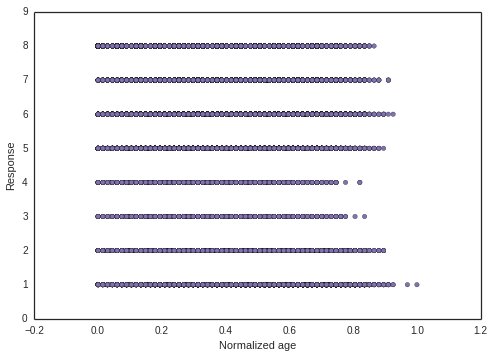

In [46]:
from matplotlib.pyplot import subplots, show

x = raw_data1.Ins_Age
y = raw_data1.Response
fig, ax = subplots()
plt.scatter(x,y, c='m')
#ax.set_title("Scatter plot of Response vs Age")
ax.set_xlabel("Normalized age")
ax.set_ylabel("Response")
show()

In [47]:
raw_data1.tail()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
59376,79142,1,D1,10,0.230769,2,3,1,0.074627,0.709091,...,0,0,0,0,0,0,0,0,0,4
59377,79143,1,D3,26,0.230769,2,3,1,0.432836,0.800000,...,0,0,0,0,0,0,0,0,0,7
59378,79144,1,E1,26,0.076923,2,3,1,0.104478,0.745455,...,0,0,0,0,0,0,0,0,0,8
59379,79145,1,D2,10,0.230769,2,3,1,0.507463,0.690909,...,1,0,0,0,0,0,0,0,0,8
59380,79146,1,A8,26,0.076923,2,3,1,0.447761,0.781818,...,0,0,0,0,0,0,0,0,0,7


In [48]:
RF.feature_importances_.size

126

In [49]:
(raw_data1.columns.difference(['Id']))


Index(['BMI', 'Employment_Info_1', 'Employment_Info_2', 'Employment_Info_3',
       'Employment_Info_4', 'Employment_Info_5', 'Employment_Info_6',
       'Family_Hist_1', 'Family_Hist_2', 'Family_Hist_3',
       ...
       'Medical_Keyword_9', 'Product_Info_1', 'Product_Info_2',
       'Product_Info_3', 'Product_Info_4', 'Product_Info_5', 'Product_Info_6',
       'Product_Info_7', 'Response', 'Wt'],
      dtype='object', length=127)

In [50]:
n=raw_data1.drop('Id',axis=1).head()
m=n.drop('Response',axis=1).head()
m

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,...,0,0,0,0,0,0,0,0,0,0
1,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,...,0,0,0,0,0,0,0,0,0,0
2,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,...,0,0,0,0,0,0,0,0,0,0
3,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,...,0,0,0,0,0,0,0,0,0,0
4,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,...,0,0,0,0,0,0,0,0,0,0


In [51]:
RF.feature_importances_


array([ 0.00275674,  0.02539571,  0.00561301,  0.04191459,  0.00091983,
        0.00634058,  0.00168861,  0.04048748,  0.0312603 ,  0.0646587 ,
        0.09311129,  0.03572676,  0.01593334,  0.00434721,  0.01302751,
        0.00402106,  0.03072026,  0.00693204,  0.00149653,  0.02112713,
        0.00554114,  0.00197716,  0.009737  ,  0.00243708,  0.00563954,
        0.00285899,  0.00426939,  0.00751985,  0.0225689 ,  0.0061777 ,
        0.0087845 ,  0.00487316,  0.00920849,  0.02400204,  0.02572889,
        0.02972561,  0.01925802,  0.03050089,  0.03010763,  0.00424084,
        0.02232076,  0.00180317,  0.00282107,  0.00220315,  0.00458498,
        0.00709717,  0.00101567,  0.00075601,  0.00305464,  0.00511802,
        0.00173433,  0.03975908,  0.00566327,  0.00210287,  0.00358888,
        0.00213267,  0.00177562,  0.00419845,  0.00143546,  0.01790531,
        0.00658472,  0.00549556,  0.00534205,  0.00118108,  0.00410027,
        0.00681244,  0.00524731,  0.00112106,  0.00327875,  0.00

In [52]:
importances =pd.DataFrame({'features' :m.columns,
                           'importances' : RF.feature_importances_})
importances.sort_values(by='importances',ascending=False).head(5)

,features,importances
10,BMI,0.093111
9,Wt,0.064659
3,Product_Info_4,0.041915
7,Ins_Age,0.040487
51,Medical_History_15,0.039759


In [53]:
importances.sort_values(by='importances',ascending=False).tail(5)

,features,importances
85,Medical_Keyword_8,0.000638
121,Medical_Keyword_44,0.000619
90,Medical_Keyword_13,0.000572
74,Medical_History_38,0.000522
71,Medical_History_35,0.000201


In [54]:
importances.shape[0]

126

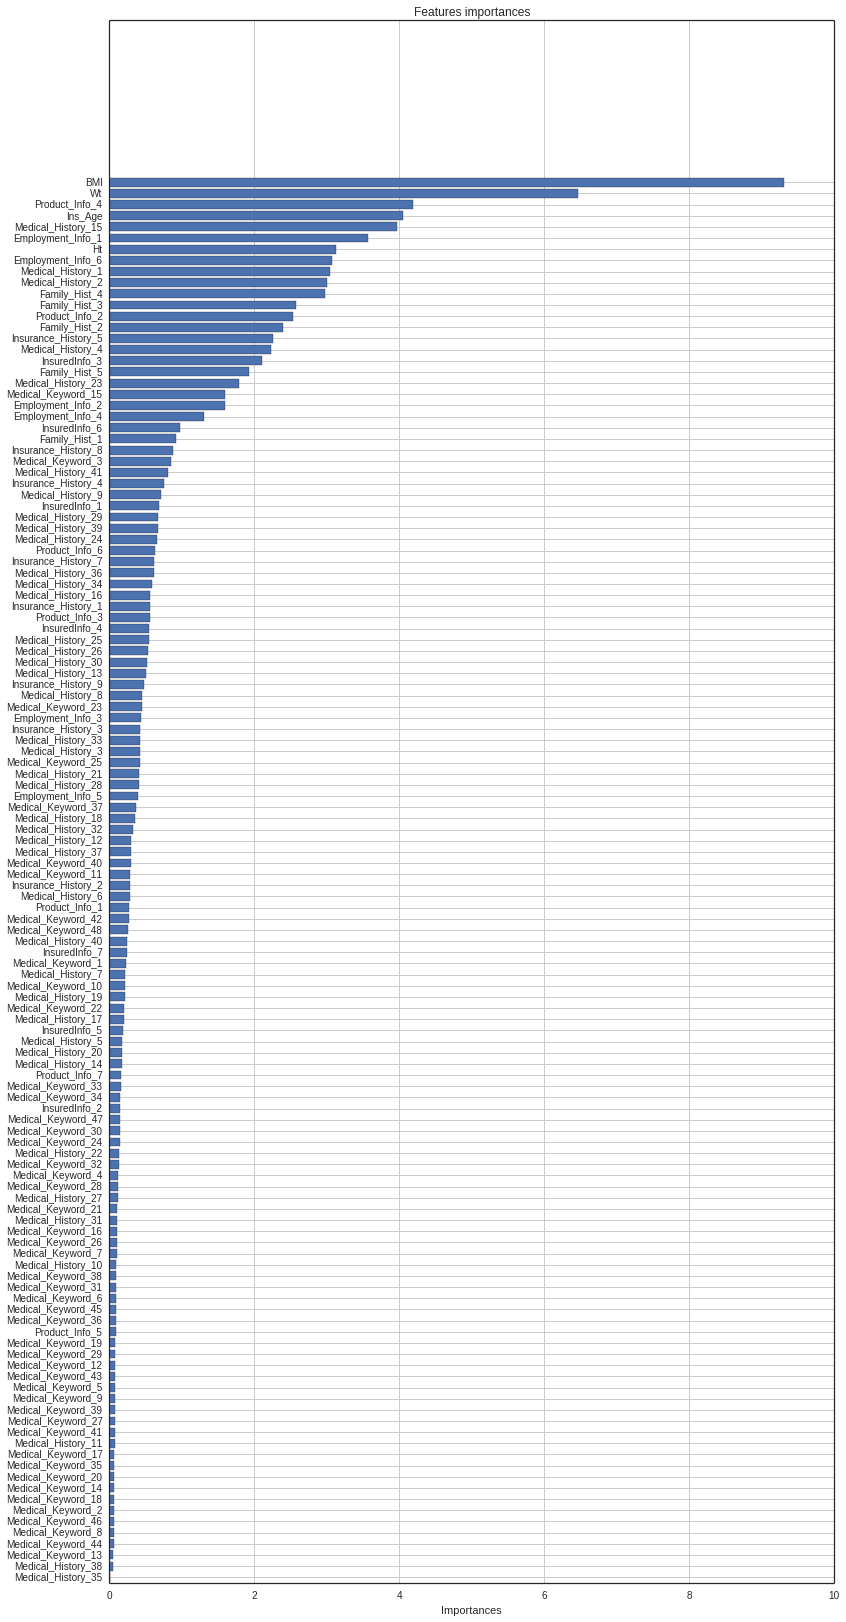

In [55]:
importances.sort_values(by = 'importances', ascending = True, inplace = True)
val = importances.importances*100    # the bar lengths
pos = np.arange(importances.shape[0])+.5 

plt.figure(figsize = (13,28))
plt.barh(pos,val, align='center')
plt.yticks(pos, importances.features.values)
plt.xlabel('Importances')
plt.title('Features importances')
plt.grid(True)

In [56]:
raw_data1[['Product_Info_1','Product_Info_2', 'Product_Info_3','Product_Info_4',
       'Product_Info_5','Product_Info_6','Product_Info_7' ]].head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7
0,1,D3,10,0.076923,2,1,1
1,1,A1,26,0.076923,2,3,1
2,1,E1,26,0.076923,2,3,1
3,1,D4,10,0.487179,2,3,1
4,1,D2,26,0.230769,2,3,1


In [57]:
raw_data1.Product_Info_3.unique()

array([10, 26, 21, 31, 29, 37, 15, 36,  8,  4, 30, 11, 23, 28, 13,  9,  6,
       33, 32,  3, 18,  2, 22, 17, 38, 19, 34, 12, 24, 20,  1, 16,  5, 27])

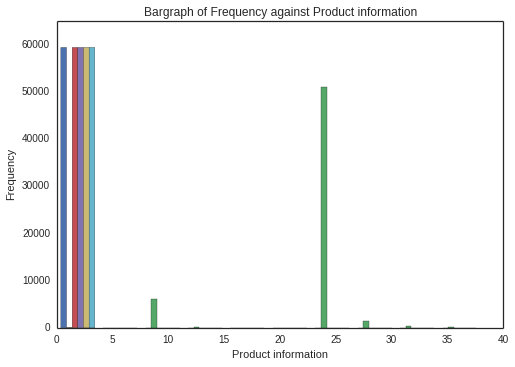

In [58]:
import matplotlib.patches as mpatches
fig, ax = subplots()
e1=raw_data1['Product_Info_1']
e3=raw_data1['Product_Info_3']
e4=raw_data1['Product_Info_4']
e5=raw_data1['Product_Info_5']
e6=raw_data1['Product_Info_6']
e7=raw_data1['Product_Info_7']
n, bins, patches = plt.hist([e1,e3,e4,e5,e6,e7])
ax.set_ylim(0,65000)
ax.set_title("Bargraph of Frequency against Product information ")
ax.set_xlabel("Product information")
ax.set_ylabel("Frequency")
show()

In [59]:
raw_data1.Product_Info_7.mode()

0    1
dtype: int64

In [60]:
raw_data1[['Employment_Info_1','Employment_Info_2', 
       'Employment_Info_3', 'Employment_Info_4',
       'Employment_Info_5', 'Employment_Info_6']].tail()

,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6
59376,0.020,1,3,0.00000,3,0.025
59377,0.100,9,1,0.00001,2,0.350
59378,0.035,9,1,0.00000,2,NaN
59379,0.038,9,1,NaN,3,NaN
59380,0.123,9,1,NaN,2,0.300


In [61]:
raw_data1.Employment_Info_3.unique()

array([1, 3])

In [62]:
raw_data1.Employment_Info_6.mode()

0    1.0
dtype: float64

/usr/local/lib/python3.4/dist-packages/numpy/lib/function_base.py:747: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/usr/local/lib/python3.4/dist-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


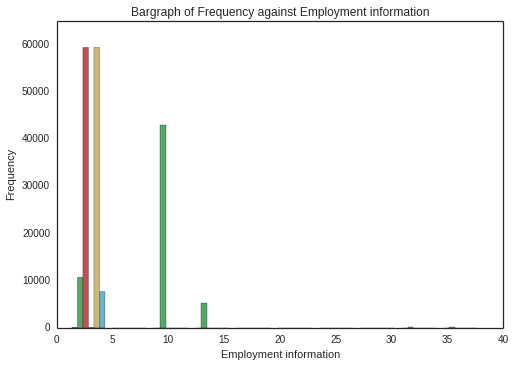

In [63]:
fig, ax = subplots()
d1=raw_data1['Employment_Info_1']
d2=raw_data1['Employment_Info_2']
d3=raw_data1['Employment_Info_3']
d4=raw_data1['Employment_Info_4']
d5=raw_data1['Employment_Info_5']
d6=raw_data1['Employment_Info_6']
n, bins, patches = plt.hist([d1,d2,d3,d4,d5,d6])

ax.set_ylim(0,65000)
ax.set_title("Bargraph of Frequency against Employment information")
ax.set_xlabel("Employment information")
ax.set_ylabel("Frequency")
show()

In [64]:
raw_data1[['InsuredInfo_1',
       'InsuredInfo_2', 'InsuredInfo_3', 'InsuredInfo_4', 'InsuredInfo_5',
       'InsuredInfo_6', 'InsuredInfo_7']].tail(5)

,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7
59376,1,2,8,3,1,2,1
59377,1,2,3,3,1,1,1
59378,1,2,6,3,1,1,1
59379,1,2,3,3,1,2,1
59380,1,2,6,3,1,1,1


In [65]:
raw_data1.InsuredInfo_6.unique()

array([2, 1])

In [66]:
raw_data1.InsuredInfo_6.mode()

0    1
dtype: int64

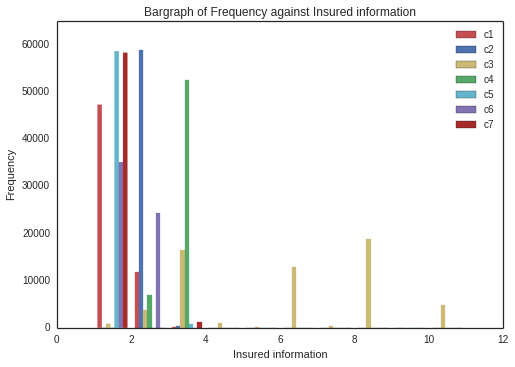

In [67]:
fig, ax = subplots()

c1=raw_data1['InsuredInfo_1']
c2=raw_data1['InsuredInfo_2']
c3=raw_data1['InsuredInfo_3']
c4=raw_data1['InsuredInfo_4']
c5=raw_data1['InsuredInfo_5']
c6=raw_data1['InsuredInfo_6']
c7=raw_data1['InsuredInfo_7']
n, bins, patches = plt.hist([c1,c2,c3,c4,c5,c6,c7])
plt.setp(patches[0], color="r")
plt.setp(patches[1], color="b")
plt.setp(patches[2], color="y")
plt.setp(patches[3], color="g")
plt.setp(patches[4], color="c")
plt.setp(patches[5], color="m")
plt.setp(patches[6], color="brown")

classes = ['c1','c2','c3','c4','c5','c6','c7']
class_colours = ['r','b','y','g','c','m','brown']
recs = []
for i in range(0,len(class_colours)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=class_colours[i]))
plt.legend(recs,classes,loc=1)


ax.set_ylim(0,65000)
ax.set_title("Bargraph of Frequency against Insured information")
ax.set_xlabel("Insured information")
ax.set_ylabel("Frequency")
show()

In [68]:
raw_data1[['Family_Hist_1', 'Family_Hist_2',
       'Family_Hist_3', 'Family_Hist_4', 'Family_Hist_5']].tail()

,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5
59376,3,0.217391,NaN,0.197183,NaN
59377,3,0.565217,NaN,0.478873,NaN
59378,3,0.173913,NaN,0.126761,NaN
59379,2,NaN,0.372549,0.704225,NaN
59380,2,NaN,0.401961,NaN,0.589286


In [69]:
raw_data1.Family_Hist_1.unique()

array([2, 3, 1])

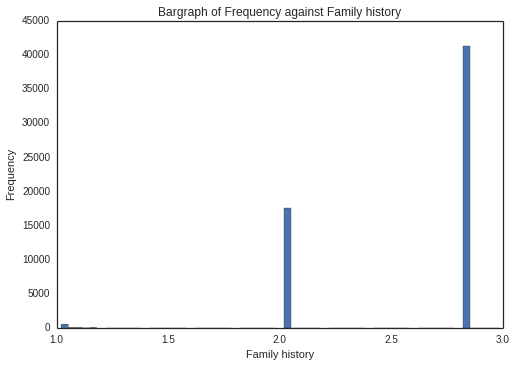

In [70]:
fig, ax = subplots()

b1=raw_data1["Family_Hist_1"]
b2=raw_data1['Family_Hist_2']
b3=raw_data1['Family_Hist_3']
b4=raw_data1['Family_Hist_4']
b5=raw_data1['Family_Hist_5']
n, bins, patches = plt.hist([b1,b2,b3,b4,b5])


ax.set_title("Bargraph of Frequency against Family history")
ax.set_xlabel("Family history")
ax.set_ylabel("Frequency")
show()


In [71]:
raw_data1.Family_Hist_5.mode()

0    0.535714
dtype: float64

In [72]:
raw_data1[['Insurance_History_1',
       'Insurance_History_2', 'Insurance_History_3', 'Insurance_History_4',
       'Insurance_History_5', 'Insurance_History_7', 'Insurance_History_8',
       'Insurance_History_9']].head()

,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9
0,1,1,3,1,0.000667,1,1,2
1,2,1,3,1,0.000133,1,3,2
2,2,1,1,3,NaN,3,2,3
3,2,1,1,3,NaN,3,2,3
4,2,1,1,3,NaN,3,2,3


In [73]:
raw_data1.Insurance_History_9.unique()

array([2, 3, 1])

In [74]:
raw_data1.Insurance_History_9.mode()

0    2
dtype: int64

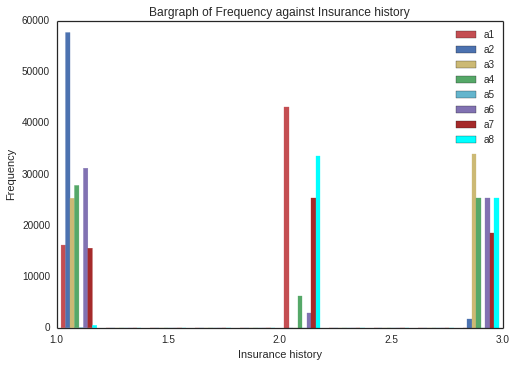

In [75]:
fig, ax = subplots()
a1=raw_data1["Insurance_History_1"]
a2=raw_data1['Insurance_History_2']
a3=raw_data1['Insurance_History_3']
a4=raw_data1['Insurance_History_4']
a5=raw_data1['Insurance_History_5']
a6=raw_data1['Insurance_History_7']
a7=raw_data1['Insurance_History_8']
a8=raw_data1['Insurance_History_9']

n, bins, patches = plt.hist([a1,a2,a3,a4,a5,a6,a7,a8])
plt.setp(patches[0], color="r")
plt.setp(patches[1], color="b")
plt.setp(patches[2], color="y")
plt.setp(patches[3], color="g")
plt.setp(patches[4], color="c")
plt.setp(patches[5], color="m")
plt.setp(patches[6], color="brown")
plt.setp(patches[7], color="aqua")

classes = ['a1','a2','a3','a4','a5','a6','a7','a8']
class_colours = ['r','b','y','g','c','m','brown','aqua']
recs = []
for i in range(0,len(class_colours)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=class_colours[i]))
plt.legend(recs,classes,loc=1)


ax.set_title("Bargraph of Frequency against Insurance history")
ax.set_xlabel("Insurance history")
ax.set_ylabel("Frequency")
show()

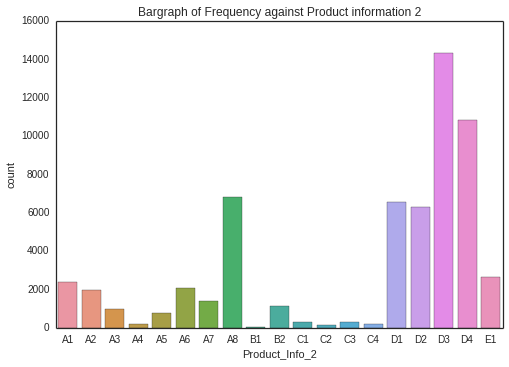

In [76]:
fig, ax = subplots()
sns.countplot(x='Product_Info_2', data=raw_data1, 
              order=['A1','A2','A3','A4','A5','A6','A7','A8',
                     'B1','B2',
                     'C1','C2','C3','C4',
                     'D1','D2','D3','D4',
                     'E1'])
ax.set_title("Bargraph of Frequency against Product information 2")

# Class imbalance

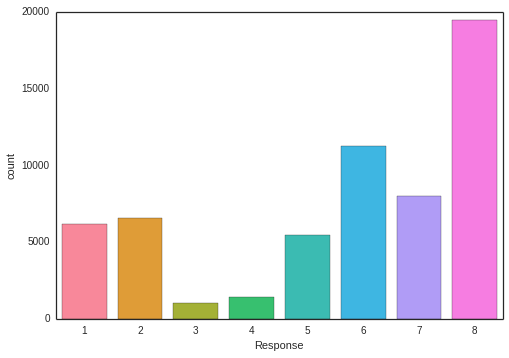

In [77]:
sns.countplot(x='Response',data=raw_data1,saturation=1)